In [1]:
import os
from pathlib import Path
import imghdr
import cv2
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from PIL import Image
from sklearn.model_selection import train_test_split,KFold,cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedKFold
import statistics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
path='/Users/Assignment-P/Cropped'

In [27]:
def get_files_recursively(folder_path):
    path = Path(folder_path)
    return [str(file) for file in path.rglob('*') if file.is_file() and imghdr.what(file) is not None]

files = get_files_recursively(path)


In [4]:
len(set(files))==len(files)

True

In [5]:
files[0],len(files)

('/Users/Assignment-P/Cropped/n02092002-Scottish_deerhound/n02092002_6534-0.jpg',
 803)

In [6]:
histogram=[]
label=[]
for i in files:
    image_pil = Image.open(i)
    image_np = np.array(image_pil)
    gray_image = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)
    (n,bins)=np.histogram(gray_image,256,[0,256])
    label.append(str(i).split('/')[4].split('-')[1])
    histogram.append(n)
    

In [7]:
len(histogram),len(histogram[0])

(803, 256)

In [8]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(histogram)

In [9]:
len(scaled_values),len(scaled_values[0]),len(label)

(803, 256, 803)

In [10]:
classes=set(label)

In [11]:
dict,lab={},{}
for i in classes:
    value_to_find = i
    indexes_of_value = [i for i, value in enumerate(label) if value == value_to_find]
    lab[i]=[label[i] for i in indexes_of_value]
    dict[i]=[j for i,j in enumerate(scaled_values) if i in indexes_of_value]


In [12]:
xtrain=[]
xtest=[]
ytrain,ytest=[],[]
for i,j in dict.items():
    X_train, X_test, y_train, y_test = train_test_split(j, lab[i], test_size=0.2, random_state=42)
    xtrain+=X_train
    xtest+=X_test
    ytrain+=y_train
    ytest+=y_test
    
    

In [13]:
len(xtrain),len(xtest),len(ytrain),len(ytest)

(640, 163, 640, 163)

In [14]:

mean_train_error,mean_val_error=[],[]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for i in [1,3,5,7,10,20]:
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(xtrain,ytrain)
    cv_results = cross_validate(knn,xtrain , ytrain, cv=kf,return_train_score=True)
    accuracy_per_fold = list(map(lambda x: 100-x, [i*100 for i in cv_results['train_score']]))
    mean_train_error.append(statistics.mean(accuracy_per_fold))
    accuracy_per_val=list(map(lambda x: 100-x, [i*100 for i in cv_results['test_score']]))
    mean_val_error.append(statistics.mean(accuracy_per_val))
    

    

In [15]:
mean_val_error,mean_train_error

([61.25, 63.28125, 62.03125, 57.1875, 55.625, 56.71875],
 [0.0, 34.0234375, 38.90625, 42.578125, 45.78125, 48.515625])

In [16]:
mean_train_error_st,mean_val_error_st=[],[]
skf=StratifiedKFold(n_splits=5,random_state=None, shuffle=False)
for i in [1,3,5,7,10,20]:
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(xtrain,ytrain)
    cv_results = cross_validate(knn,xtrain , ytrain, cv=skf,return_train_score=True)
    accuracy_per_fold = list(map(lambda x: 100-x, [i*100 for i in cv_results['train_score']]))
    mean_train_error_st.append(statistics.mean(accuracy_per_fold))
    accuracy_per_val=list(map(lambda x: 100-x, [i*100 for i in cv_results['test_score']]))
    mean_val_error_st.append(statistics.mean(accuracy_per_val))

In [17]:
mean_train_error_st,mean_val_error_st

([0.0, 33.59375, 39.1796875, 41.953125, 45.390625, 48.4765625],
 [60.3125, 63.125, 60.78125, 59.375, 58.125, 56.09375])

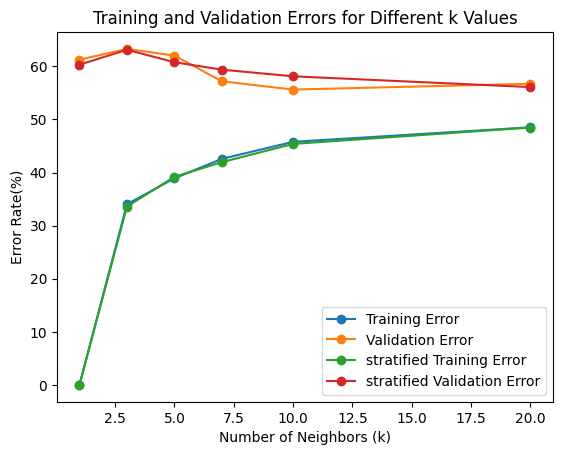

In [18]:
fig, ax = plt.subplots()

ax.plot([1,3,5,7,10,20], mean_train_error, label='Training Error', marker='o')
ax.plot([1,3,5,7,10,20], mean_val_error, label='Validation Error', marker='o')
ax.plot([1,3,5,7,10,20], mean_train_error_st, label='stratified Training Error', marker='o')
ax.plot([1,3,5,7,10,20], mean_val_error_st, label='stratified Validation Error', marker='o')

ax.set(xlabel='Number of Neighbors (k)', ylabel='Error Rate(%)',
       title='Training and Validation Errors for Different k Values')
ax.legend()

plt.show()

In [19]:
# at k=20, the stratified mean validation error is low

In [20]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(xtrain,ytrain)
pred=knn.predict(xtest)
print('Test Error')
print(1-accuracy_score(ytest,pred))

Test Error
0.5889570552147239


In [21]:
# For Standard Training Error, lowest mean error is at k=1
# For stratified Training Error, lowest mean error is at k=1
# For Standard validation error, lowest mean error is at k=20
# For startified validation error, lowest mean error is at k=20

In [22]:
# There is overfitting at lower k value as training error is low and validation error is high. There is no underfitting as both training error and 
# validation error are high

# Complexity of model with respect to K:
# As K is low, the model becomes complex and it may cause overfitting as it may consider noise as well during training. 
# when k is high, model becomes simple and may cause underfitting

### For question number 5: Classifiers are
#### 1 Neural Network
#### 2 Decision Tree
#### 3 Random Forest

In [23]:
skf = StratifiedKFold(n_splits=5)
def scoress(model,xtrain,ytrain,xtest,ytest):
    model.fit(xtrain, ytrain)
    pred=model.predict(xtest)
    score=accuracy_score(ytest,pred)
    val_scores = cross_val_score(model, xtrain, ytrain, cv=skf, scoring='accuracy')
    mean_val_Ac=np.mean(val_scores)
    f1=f1_score(ytest,pred, average="weighted")
    pred_cross = cross_val_predict(model, xtrain, ytrain, cv=skf)
    mat = confusion_matrix(ytrain, pred_cross)
    print(mat/5)
    fig, ax = plot_confusion_matrix(conf_mat=mat/5, show_absolute=True, show_normed=True, colorbar=True,class_names=NN.classes_)
    plt.title('Confusion Matrix')
    plt.show()
    return score,mean_val_Ac,f1

    

[[ 9.2  5.2  3.6  7.6]
 [ 4.2  9.4 10.6  5.2]
 [ 3.8 11.  16.   8.4]
 [ 7.   6.   7.4 13.4]]


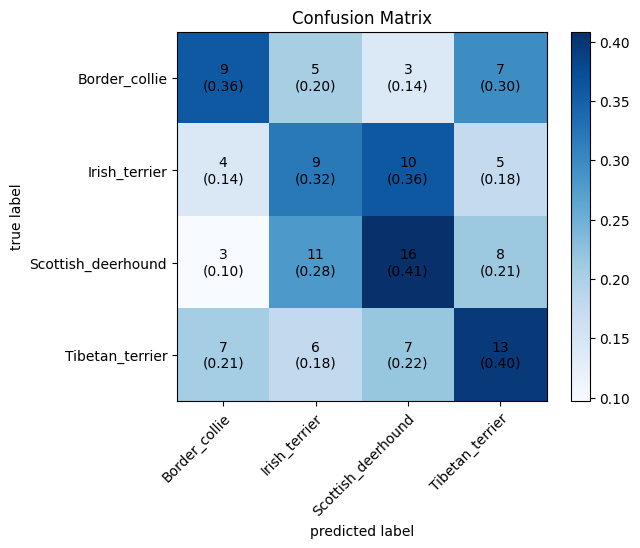

accuracy:0.3496932515337423 mean validation error:0.3765625 f1score:0.35066548810648585


In [24]:
NN= MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
score,mean_val_Ac,f1=scoress(NN,xtrain,ytrain,xtest,ytest)
print(f'accuracy:{score} mean validation error:{mean_val_Ac} f1score:{f1}')


[[14.2  1.2  2.8  7.4]
 [ 2.6 10.4 12.   4.4]
 [ 2.2  7.2 20.8  9. ]
 [ 6.2  0.8  7.6 19.2]]


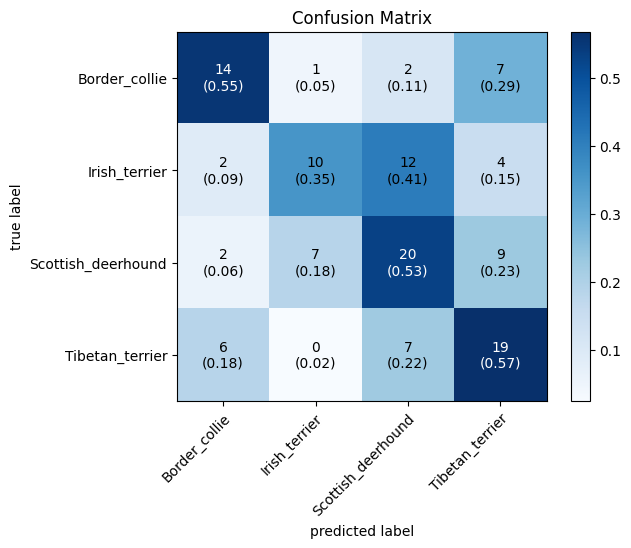

accuracy:0.4233128834355828 mean validation error:0.5046875 f1score:0.4260267392225814


In [25]:

rf = RandomForestClassifier(random_state=42)
score,mean_val_Ac,f1=scoress(rf,xtrain,ytrain,xtest,ytest)
print(f'accuracy:{score} mean validation error:{mean_val_Ac} f1score:{f1}')


[[ 8.8  4.2  5.4  7.2]
 [ 3.  12.  11.8  2.6]
 [ 2.8 11.  14.8 10.6]
 [ 7.   3.8  8.2 14.8]]


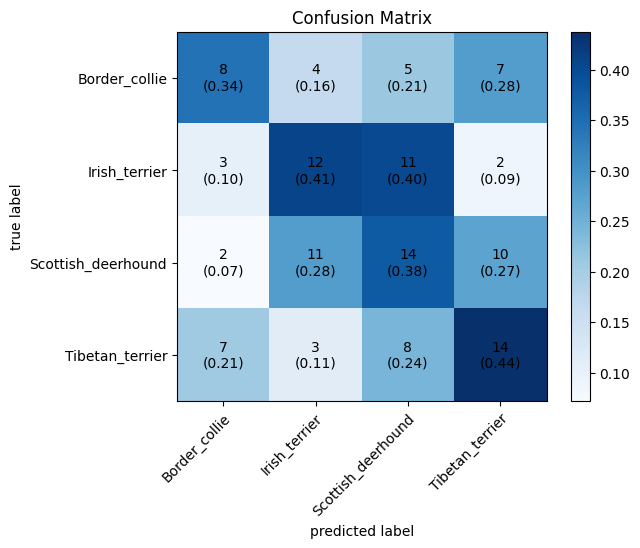

accuracy:0.3619631901840491 mean validation error:0.359375 f1score:0.35898628032277435


In [26]:
clf = DecisionTreeClassifier(max_depth=10)
score,mean_val_Ac,f1=scoress(clf,xtrain,ytrain,xtest,ytest)
print(f'accuracy:{score} mean validation error:{mean_val_Ac} f1score:{f1}')

#### Confusion matrix- RandomForestClassifier is better as sum of all diagonal elements(True Positive) is higher than other classifiers 
#### Accuracy- RandomForestClassifier is better as it has high value
#### Mean Validation error- RandomForestClassifier is better as it has high value
#### F-Measure- RandomForestClassifier is better as it has high value

# References

### https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
### https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/
### https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
### https://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html#
### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html